In [1]:
import os
import pickle

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import sys
import pandas as pd
#import tensorflow
#import keras

from collections import defaultdict
from heapq import nlargest


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\d.cadavid141\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
from matplotlib.gridspec import GridSpec
#import missingno as msno
import re
from collections import Counter

import string
import sys
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.sparse import csr_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,roc_curve
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import time
import sys
import math
import itertools
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#import folium
#from folium.plugins import Fullscreen
#import geopandas as gpd
import json
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Defining functions
def PCA_var(varianza,X):
    """
    Function responsible for calculating the number of components to explain the % of variance 
    
    Returns:
        number of components
    """
 
   
    pca = PCA(varianza)
    pca_fit = pca.fit(X)
    features = pca_fit.n_components_
    
    return features
    
    
def PCA_comp(comp,X):
    """
    Function responsible for calculating the explained variance based on a number of components
    
    Returns:
        Explained variance
    """
    
    pca = PCA(n_components=comp)
    pca_fit = pca.fit(X)
    var = np.sum(pca_fit.explained_variance_ratio_)
    
    return var

In [5]:
os.getcwd()

'C:\\Users\\d.cadavid141\\Documents\\Coisas Daniela\\201920\\201920\\03_Codigos'

In [6]:
#os.chdir("/Users/danielacadavid/Documents/Universidad/Maestria/201920/00_Bases/brazilian-ecommerce/")
os.chdir("C:\\Users\\d.cadavid141\\Documents\\Coisas Daniela\\201920\\201920\\00_Bases\\brazilian-ecommerce\\")
os.getcwd()

'C:\\Users\\d.cadavid141\\Documents\\Coisas Daniela\\201920\\201920\\00_Bases\\brazilian-ecommerce'

In [7]:
orders=pd.read_csv('data_tratada_v_nao.csv')

In [8]:
####### ACA SE CREA EL TFIDF

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(orders.review_comment_message).toarray()
#y_count = orders.review_score

# Creating the class label
#bin_edges = [0, 2, 5]
#bin_names = ['0', '1']
#reviews['class'] = pd.cut(reviews['review_score'], bins=bin_edges, labels=bin_names)
#X = reviews['review_comment_message']
#y = reviews['class'].values
#y = y.astype(int)
#X_tfidf = X_tfidf.todense()

In [9]:
#orders.head(5)

In [10]:
# Creating the class label
bin_edges = [0, 2, 5]
bin_names = ['0', '1']
orders['class'] = pd.cut(orders['review_score'] , bins=bin_edges, labels=bin_names)
#orders = orders.iloc[:, np.r_[0, 1, 3, 4, 2, 5,6]

In [11]:
y = orders['class'].values
Y_tf = y.astype(int)
Y_tf

array([1, 1, 1, ..., 1, 0, 0])

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, Y_tf, test_size = 3/10, random_state = 9)

In [13]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(X_train)
X_std_test = StandardScaler().fit_transform(X_test)

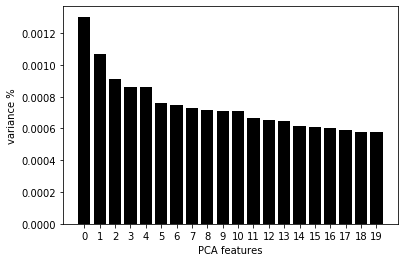

In [16]:
# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [19]:

# Ao ter tao pouca varianza explicada com 20 componentes se analiza se continuar usando: 
# Sao necessarios muitos componentes para explicar el 95% de la varianza 

var=0.7
#comp=20
print('Precisa de: '+f'{PCA_var(var,X_std)}'+' para obter '+f'{var*100}'+'% de varianza')
#print('Obteria: '+f'{PCA_comp(comp,X_std)*100}'+'% de varianza explicada com '+f'{comp}'+' componentes')
# Make an instance of the Model
#pca = PCA(.7)

Precisa de: 3216 para obter 70.0% de varianza


In [17]:
#Transformo mi base a componentes principales
# Make an instance of the Model
pca = PCA()

In [18]:
#Fit PCA on training set. Note: you are fitting PCA on the training set only.
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
#Apply the mapping (transform) to both the training set and the test set.
X_train_pca = pca.transform(X_std)
X_test_pca = pca.transform(X_std_test)

In [22]:
pca.fit(X_std)
variance = pca.explained_variance_ratio_ #calculate variance ratios

In [23]:
var=np.cumsum(variance)

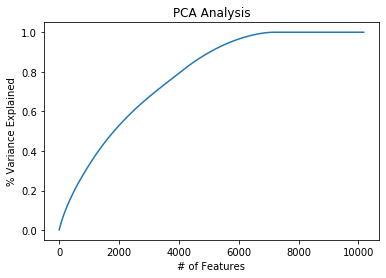

In [24]:
#%matplotlib notebook
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
#plt.ylim(10176,100.5)
#plt.style.context('seaborn-whitegrid')
plt.plot(var)

## Aca entreno mi PCA

In [14]:
pca = PCA(0.7)

In [15]:
#Fit PCA on training set. Note: you are fitting PCA on the training set only.
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=0.7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# save the model to disk
filename = 'finalized_model_pca.sav'
pickle.dump(pca, open(filename, 'wb'))

In [16]:
#Apply the mapping (transform) to both the training set and the test set.
X_train_pca = pca.transform(X_std)
X_test_pca = pca.transform(X_std_test)

In [17]:
X_train_mod=pd.DataFrame(X_train_pca)
#X_train_mod.columns = cols

X_test_mod=pd.DataFrame(X_test_pca)
#X_test_mod.columns = cols

In [18]:
len(X_train_mod.columns)

3216

In [19]:
X_train_n=X_train_mod
X_test_n=X_test_mod

In [20]:
x_cols=pd.DataFrame(X_train)
cols=vectorizer.get_feature_names()
x_cols.columns = cols

teste_cols=cols[256:306]


In [21]:
teste_mostra=pd.DataFrame(x_cols.loc[:49,teste_cols])

In [22]:
teste_mostra.shape

(50, 50)

In [23]:
data=pd.DataFrame(pca.components_)
mostra=pd.DataFrame(data.loc[:4,:49])
mostra.shape

(5, 50)

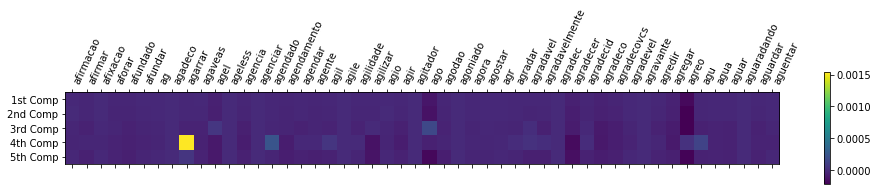

In [24]:
plt.matshow(mostra,cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(teste_mostra.columns)),teste_mostra.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

### GRADIENT BOOSTING 

In [27]:
from tqdm import tqdm
getattr(tqdm, '_instances', {}).clear()  # ⬅ add this line

In [28]:
auc_f=0
idx = 0
dif=0.000005
random = [1,len(X_train_mod.columns)]
array_gb= np.empty((3216, 3))

for var in tqdm(range(len(X_train_mod.columns))):
    
    if var==0:
        X_train_t=X_train_n[X_train_n.columns[0:1]]
        X_test_t =X_test_n[X_test_n.columns[0:1]]
        gb_clf = GradientBoostingClassifier(learning_rate=0.6,max_depth=5, random_state=9)
        gb_clf.fit(X_train_t, y_train)
        rf_roc_auc=roc_auc_score(y_test, gb_clf.predict(X_test_t))
        rf_roc_auc_train=roc_auc_score(y_train, gb_clf.predict(X_train_t))
        vect_random=[1,rf_roc_auc,rf_roc_auc_train]
        array_gb = vect_random
    else:
        X_train_t=X_train_n[X_train_n.columns[0:var+1]]
        X_test_t =X_test_n[X_test_n.columns[0:var+1]]
        gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.6, max_features="sqrt", max_depth=5, random_state=9)
        gb_clf.fit(X_train_t, y_train)
        rf_roc_auc=roc_auc_score(y_test, gb_clf.predict(X_test_t))
        rf_roc_auc_train=roc_auc_score(y_train, gb_clf.predict(X_train_t))
        vect_random=[var+1,rf_roc_auc,rf_roc_auc_train]
 #       idx=var+1
        array_gb = np.vstack((array_gb,vect_random))
        
    if rf_roc_auc>auc_f:
        auc_f=rf_roc_auc
        idx=var+1
        if idx in [1,100,500,1000,1500]:
            print("Iteracion: ",idx)
    else:
        auc_f=auc_f
        idx=idx
        #break    # break here
        
    df_return = idx
print("Se necesitan: ", idx," variables")
print("Para tener: {0:.3f}".format(auc_f*100)," de AUC")

 12%|█▏        | 384/3216 [43:55<5:23:56,  6.86s/it]


Iteracion:  1


100%|██████████| 3216/3216 [85:25:27<00:00, 95.62s/it]    


Se necesitan:  1895  variables
Para tener: 84.002  de AUC


In [29]:
salvar_gb=pd.DataFrame(array_gb)
cols_array=['NumComp','AUC','AUC_train']
salvar_gb.columns=cols_array
salvar_gb.to_csv('array_gb_pca.csv')

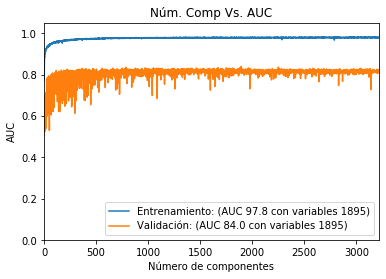

In [30]:
%matplotlib inline
plt.figure()
plt.plot(array_gb[:,0], array_gb[:,2],label='Entrenamiento: (AUC {0:.1f}'.format(array_gb[df_return-1,2]*100)+' con variables {0:.0f}'.format(array_gb[df_return-1,0])+')')
plt.plot(array_gb[:,0], array_gb[:,1],label='Validación: (AUC {0:.1f}'.format(array_gb[df_return-1,1]*100)+' con variables {0:.0f}'.format(array_gb[df_return-1,0])+')')

#plt.plot(array_gb[:,0], array_gb[:,1],label='Mayor: (AUC {0:.1f}'.format(0.8517*100)+' con variables {0:.0f}'.format(array_gb[df_return-1,0])+')')

#plt.plot([0, 1586.0], [0, 1],'r--')
plt.xlim([0.0, 3217])
plt.ylim([0.0, 1.05])
plt.xlabel('Número de componentes')
plt.ylabel('AUC')
plt.title('Núm. Comp Vs. AUC')
plt.legend(loc="lower right")
plt.savefig('GB_PCA')
plt.show()

In [34]:
gb_roc_auc_train=roc_auc_score(y_train, gb_clf.predict(X_train_t))

gb_roc_auc_train*100

97.81992256516226

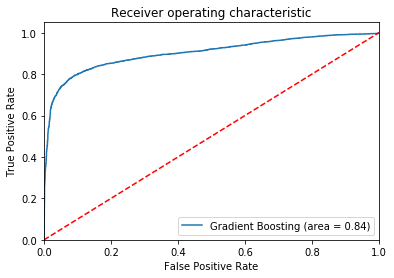

In [36]:
# ROC GB
%matplotlib inline
#rf_roc_auc = roc_auc_score(y_test, gb_clf.predict(X_test_t))
fpr, tpr, thresholds = roc_curve(y_test, gb_clf.predict_proba(X_test_t)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc)
#plt.plot(fpr, tpr, label='Random Forest (area = %2.1f)' % (gb_roc_auc*100))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GB_ROC_PCA')
plt.show()